# Feature building

## Import and set up

In [19]:
# import relevant packages
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set up paths
data_dir = "../data"

In [3]:
# import data 
df = pd.read_csv(os.path.join(data_dir, 'df_clean.csv'))
print(df.shape)
df.head()

(497376, 20)


/opt/anaconda3/envs/dsr-minicomp/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Weekday
0,2013-01-01,353.0,3139.0,820.0,1.0,0.0,a,1.0,b,b,900.0,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov",1,2013,1
1,2013-01-01,335.0,2401.0,482.0,1.0,0.0,a,1.0,b,a,90.0,NaN,NaN,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2013,1
2,2013-01-01,512.0,2646.0,625.0,1.0,0.0,a,1.0,b,b,590.0,NaN,NaN,1.0,5.0,2013.0,"Mar,Jun,Sept,Dec",1,2013,1
3,2013-01-01,494.0,3113.0,527.0,1.0,0.0,a,1.0,b,a,1260.0,6.0,2011.0,0.0,NaN,NaN,NaN,1,2013,1
4,2013-01-01,530.0,2907.0,532.0,1.0,0.0,a,1.0,a,c,18160.0,NaN,NaN,0.0,NaN,NaN,NaN,1,2013,1


## Check duplicates

In [4]:
df.duplicated().sum()

0

## Check and fill missing values

In [5]:
df.isnull().sum()

Date                              0
Store                             0
Sales                             0
Customers                     14984
Open                          15010
Promo                         15012
StateHoliday                  15031
SchoolHoliday                 15093
StoreType                         0
Assortment                        0
CompetitionDistance            1305
CompetitionOpenSinceMonth    158067
CompetitionOpenSinceYear     158067
Promo2                            0
Promo2SinceWeek              244960
Promo2SinceYear              244960
PromoInterval                244960
Month                             0
Year                              0
Weekday                           0
dtype: int64

In [6]:
# fill missing "open" data with 0 if sales is 0 else with mode
mask = (df["Sales"] == 0) & (df["Open"].isna())
df.loc[mask, "Open"] = df.loc[mask, "Open"].fillna(value=0)

# fill remaining missing "open" data with mode
mode = df["Open"].mode()[0]
df["Open"].fillna(value=mode, inplace=True)
print(mode)

1.0


In [7]:
# fill missing "promo" data with mode
mode = df["Promo"].mode()[0]
df["Promo"].fillna(value=mode, inplace=True)
print(mode)

0.0


In [8]:
# fill missing "SchoolHoliday" data with mode
mode = df["SchoolHoliday"].mode()[0]
df["SchoolHoliday"].fillna(value=mode, inplace=True)
print(mode)

0.0


In [9]:
# Create new feature Holiday, initially by default no holiday (0)
df["Holiday"] = 0

# Whenever StateHoliday indicates a holiday make it 1
mask = (df["StateHoliday"].isin(["a", "b", "c"]))
df.loc[mask, "Holiday"] = 1

# Whenever StateHoliday is missing, but sales is 0 and store is closed, make it a holiday
mask2 = ((df["StateHoliday"].isna()) & (df["Sales"] == 0) & (df["Open"] == 0))
df.loc[mask2, "Holiday"] = 1

In [22]:
df.head()

,Date,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Weekday,Holiday
0,2013-01-01,353.0,3139.0,820.0,1.0,0.0,a,1.0,b,b,...,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov",1,2013,1,1
1,2013-01-01,335.0,2401.0,482.0,1.0,0.0,a,1.0,b,a,...,NaN,NaN,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2013,1,1
2,2013-01-01,512.0,2646.0,625.0,1.0,0.0,a,1.0,b,b,...,NaN,NaN,1.0,5.0,2013.0,"Mar,Jun,Sept,Dec",1,2013,1,1
3,2013-01-01,494.0,3113.0,527.0,1.0,0.0,a,1.0,b,a,...,6.0,2011.0,0.0,NaN,NaN,NaN,1,2013,1,1
4,2013-01-01,530.0,2907.0,532.0,1.0,0.0,a,1.0,a,c,...,NaN,NaN,0.0,NaN,NaN,NaN,1,2013,1,1


In [26]:
# Create customer feature
cust_dict = df.groupby(["Store"]).mean().loc[:, "Customers"].to_dict()
df.loc[:, 'Customers_enc'] = df.loc[:,'Store'].map(cust_dict)
df.head()

,Date,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Weekday,Holiday,Customers_enc
0,2013-01-01,353.0,3139.0,820.0,1.0,0.0,a,1.0,b,b,...,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov",1,2013,1,1,1369.865900
1,2013-01-01,335.0,2401.0,482.0,1.0,0.0,a,1.0,b,a,...,NaN,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2013,1,1,2390.065789
2,2013-01-01,512.0,2646.0,625.0,1.0,0.0,a,1.0,b,b,...,NaN,1.0,5.0,2013.0,"Mar,Jun,Sept,Dec",1,2013,1,1,1236.679752
3,2013-01-01,494.0,3113.0,527.0,1.0,0.0,a,1.0,b,a,...,2011.0,0.0,NaN,NaN,NaN,1,2013,1,1,1073.807985
4,2013-01-01,530.0,2907.0,532.0,1.0,0.0,a,1.0,a,c,...,NaN,0.0,NaN,NaN,NaN,1,2013,1,1,723.477407


## Train test split

In [35]:
# Get X and y
y = df["Sales"]
X = df.copy()

print(y.shape)
print(X.shape)

(497376,)
(497376, 22)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(397900,)
(397900, 22)
(99476,)
(99476, 22)


## Mean encode categorical variables

In [37]:
# Get mean of target variable for StoreType - mean encoding
storetype_dict = X_train.groupby(["StoreType"]).mean().loc[:, "Sales"].to_dict()
X_train.loc[:, 'StoreType_enc'] = X_train.loc[:,'StoreType'].map(storetype_dict).fillna(X_train.loc[:,"Sales"].mean())
X_test.loc[:, 'StoreType_enc'] = X_test.loc[:,'StoreType'].map(storetype_dict).fillna(X_train.loc[:,"Sales"].mean()) 

/opt/anaconda3/envs/dsr-minicomp/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [38]:
# Get mean of target variable for Assortment - mean encoding
assortment_dict = X_train.groupby(["Assortment"]).mean().loc[:, "Sales"].to_dict()
X_train.loc[:, 'Assortment_enc'] = X_train.loc[:,'Assortment'].map(assortment_dict).fillna(X_train.loc[:,"Sales"].mean())
X_test.loc[:, 'Assortment_enc'] = X_test.loc[:,'Assortment'].map(assortment_dict).fillna(X_train.loc[:,"Sales"].mean()) 

In [39]:
# Get mean of target variable for Assortment - mean encoding
storeid_dict = X_train.groupby(["Store"]).mean().loc[:, "Sales"].to_dict()
X_train.loc[:,'Store_enc'] = X_train.loc[:,'Store'].map(storeid_dict).fillna(X_train.loc[:,"Sales"].mean())
X_test.loc[:,'Store_enc'] = X_test.loc[:,'Store'].map(storeid_dict).fillna(X_train.loc[:,"Sales"].mean()) 

In [42]:
# Fill missing Competitiondistance with median
X_train.loc[:, "CompetitionDistance"].fillna(X_train.loc[:, "CompetitionDistance"].median(), inplace=True)
X_test.loc[:, "CompetitionDistance"].fillna(X_train.loc[:, "CompetitionDistance"].median(), inplace=True)

/opt/anaconda3/envs/dsr-minicomp/lib/python3.9/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/anaconda3/envs/dsr-minicomp/lib/python3.9/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## Plotting

In [47]:
X_train.columns

Index(['Date', 'Store', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Month', 'Year',
       'Weekday', 'Holiday', 'Customers_enc', 'StoreType_enc',
       'Assortment_enc', 'Store_enc'],
      dtype='object')

<AxesSubplot:xlabel='Holiday'>

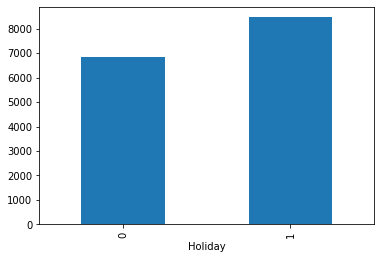

In [58]:
# Plot holiday and sales
plot_df = X_train.groupby("Holiday").mean().loc[:, "Sales"]
plot_df
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='Promo'>

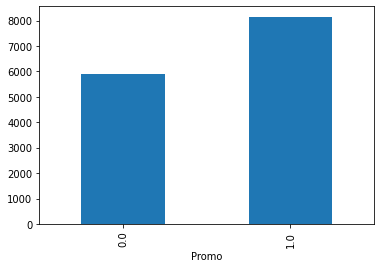

In [59]:
# Plot promo and sales
plot_df = X_train.groupby("Promo").mean().loc[:, "Sales"]
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='SchoolHoliday'>

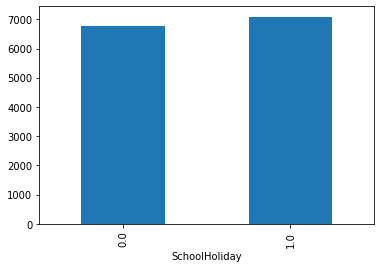

In [60]:
# Plot schoolholiday and sales
plot_df = X_train.groupby("SchoolHoliday").mean().loc[:, "Sales"]
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='Month'>

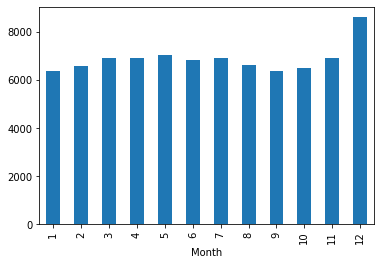

In [61]:
# Plot sales per month
plot_df = X_train.groupby("Month").mean().loc[:, "Sales"]
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='Weekday'>

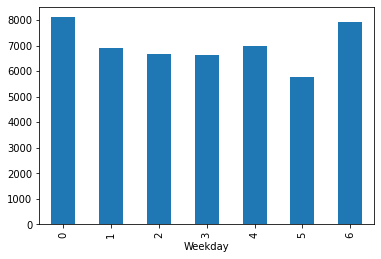

In [62]:
# Plot sales per weekday
plot_df = X_train.groupby("Weekday").mean().loc[:, "Sales"]
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='Year'>

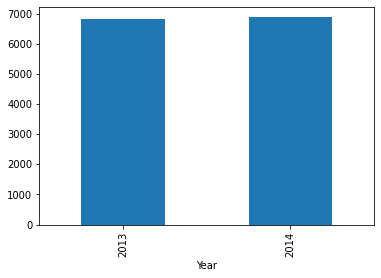

In [63]:
# Plot sales per year
plot_df = X_train.groupby("Year").mean().loc[:, "Sales"]
plot_df.plot.bar(y="Sales")

<AxesSubplot:xlabel='Customers_enc'>

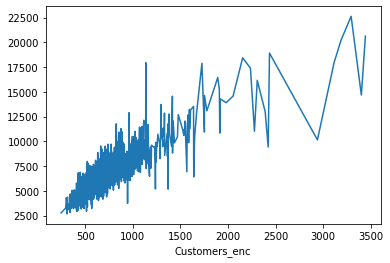

In [69]:
# Plot sales per average number of customers in store
plot_df = X_train.groupby("Customers_enc").mean().loc[:, "Sales"]
plot_df.plot(x="Customers_enc", y="Sales")

<AxesSubplot:xlabel='CompetitionDistance'>

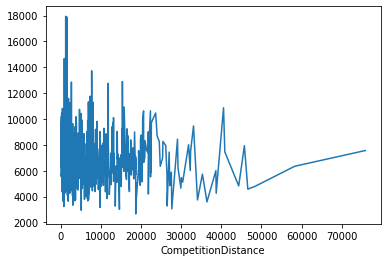

In [70]:
# Plot sales in relation to competition distance
plot_df = X_train.groupby("CompetitionDistance").mean().loc[:, "Sales"]
plot_df.plot(x="CompetitionDistance", y="Sales")

## Save files

In [71]:
X_train.to_csv(os.path.join(data_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(data_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(data_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(data_dir, 'y_test.csv'), index=False)